PROJECT:Travel Aggregator Analysis

In [2]:
import pandas as pd


# Load the datasets
bookings_path = 'D:/desktop/Data Sceince_Edureka/PROJECT_PYTHON/edureka project/Bookings.csv'
sessions_path = 'D:/desktop/Data Sceince_Edureka/PROJECT_PYTHON/edureka project/Sessions.csv'
# Read the CSV files
bookings_df = pd.read_csv(bookings_path)
sessions_df = pd.read_csv(sessions_path)

In [3]:
sessions_df.head(10) #display the first 10 rows of sessions_df

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
5,session_322,search_506,2020-01-21T21:10:58.482Z,2020-01-21T21:10:12Z,booking_54
6,session_283,search_880,2020-01-21T05:33:48.061Z,2020-01-21T05:33:33.559Z,booking_106
7,session_194,search_312,2019-09-05T09:04:40.423Z,2019-09-05T09:04:32Z,booking_1
8,session_52,search_1227,2020-01-20T16:54:07.232Z,2020-01-20T16:53:47.477Z,NaN
9,session_52,search_1110,2020-01-20T17:03:52.145Z,2020-01-20T16:53:47.477Z,booking_282


In [5]:
bookings_df.head(10) ## Display the first 10 rows of each dataframe to understand their structure

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4
5,customer_99,booking_241,Gurgaon,India,Roissy-en-France,France,2021-04-13T16:12:34Z,IOS,21843.20,GOIBIBO,1.0,11.0,6570.4
6,customer_28,booking_129,Kolkata,India,Gurgaon,India,2022-02-16T15:50:27Z,Desktop,13442.40,GOIBIBO,1.0,13.0,1310.7
7,customer_217,booking_18,Bhubaneswar,India,Durlaga,India,2021-09-10T19:09:12Z,Desktop,4352.00,GOIBIBO,2.0,47.0,260.5
8,customer_161,booking_136,Gurgaon,India,Amsterdam,Netherlands,2022-03-14T15:05:23Z,Desktop,64316.80,MMT,1.0,86.0,6354.9
9,customer_150,booking_289,Delhi,India,Hamburg,Germany,2018-09-25T18:29:22Z,Desktop,47974.93,YATRA,1.0,17.0,6275.7


In [13]:

# 1.Find the number of distinct bookings, sessions, and searches from the given data sets
num_distinct_bookings = bookings_df['booking_id'].nunique()
num_distinct_sessions = sessions_df['session_id'].nunique()
num_distinct_searches = sessions_df['search_id'].nunique()

print(f"Number of distinct bookings: {num_distinct_bookings}")
print(f"Number of distinct sessions: {num_distinct_sessions}")
print(f"Number of distinct searches: {num_distinct_searches}")

Number of distinct bookings: 339
Number of distinct sessions: 331
Number of distinct searches: 1360


In [9]:
#2.How many sessions have more than one booking


# Group by session_id and count the number of unique booking_id within each session
session_booking_counts = sessions_df.groupby('session_id')['booking_id'].nunique()

# Filter the sessions where the count of unique booking_id is greater than one
sessions_with_multiple_bookings = session_booking_counts[session_booking_counts > 1].count()

print(f'Sessions with more than one booking: {sessions_with_multiple_bookings}')


Sessions with more than one booking: 10


In [12]:
#3.Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week

import matplotlib.pyplot as plt

# Convert booking_time to datetime format
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'])

# Extract day of the week from booking_time (0=Monday, 6=Sunday)
bookings_df['day_of_week'] = bookings_df['booking_time'].dt.dayofweek

# Count the number of bookings for each day of the week
bookings_per_day = bookings_df['day_of_week'].value_counts().sort_index()

# Map day_of_week numbers to day names
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
bookings_per_day.index = bookings_per_day.index.map(day_name_map)

# Print the day with the highest number of bookings
most_bookings_day = bookings_per_day.idxmax()
most_bookings_count = bookings_per_day.max()
print(f"The day with the highest number of bookings is {most_bookings_day} with {most_bookings_count} bookings.")




The day with the highest number of bookings is Thursday with 65 bookings.


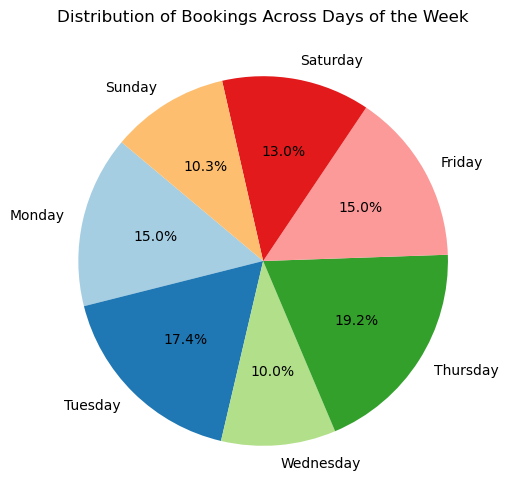

In [13]:

# Plot a pie chart
plt.figure(figsize=(10, 6))
bookings_per_day.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.ylabel('')
plt.title('Distribution of Bookings Across Days of the Week')
plt.show()


In [ ]:
#4.For each of the service names, display the total number of bookings and the total Gross Booking Value in INR

In [14]:

# Group by service_name and calculate the total number of bookings and total Gross Booking Value
service_summary = bookings_df.groupby('service_name').agg(
    total_bookings=('booking_id', 'count'),
    total_gbv_inr=('INR_Amount', 'sum')
).reset_index()

# Display the summary
print(service_summary)


  service_name  total_bookings  total_gbv_inr
0      GOIBIBO             186     5897637.97
1          MMT              48      665669.08
2        YATRA             105     3378702.13


In [ ]:
#5,For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [15]:

# Group by customer_id and filter customers with more than one booking
customers_with_multiple_bookings = bookings_df.groupby('customer_id').filter(lambda x: len(x) > 1)

# Group by from_city and to_city and count the number of bookings for each route
route_counts = customers_with_multiple_bookings.groupby(['from_city', 'to_city']).size().reset_index(name='count')

# Find the most booked route
most_booked_route = route_counts.loc[route_counts['count'].idxmax()]

# Display the most booked route
print(f"The most booked route for customers with more than one booking is from {most_booked_route['from_city']} to {most_booked_route['to_city']} with {most_booked_route['count']} bookings.")


The most booked route for customers with more than one booking is from Gurgaon to Roissy-en-France with 5 bookings.


In [ ]:
#6.Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city

In [16]:

# Filter cities with at least 5 departures
departure_city_counts = bookings_df['from_city'].value_counts()
cities_with_min_departures = departure_city_counts[departure_city_counts >= 5].index

# Filter the dataframe to include only these cities
filtered_bookings_df = bookings_df[bookings_df['from_city'].isin(cities_with_min_departures)]

# Group by from_city and calculate the average days_to_departure for each city
avg_days_to_departure = filtered_bookings_df.groupby('from_city')['days_to_departure'].mean().reset_index()

# Sort by average days_to_departure in descending order and get the top 3 cities
top_3_cities = avg_days_to_departure.sort_values(by='days_to_departure', ascending=False).head(3)

# Display the top 3 cities
print("Top 3 departure cities where customers book mostly in advance:")
print(top_3_cities)


Top 3 departure cities where customers book mostly in advance:
    from_city  days_to_departure
1     Bālāpur          46.166667
4  Devanhalli          29.583333
2     Chennai          26.187500


#7.Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set, have the maximum correlation

In [6]:
#7.Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set, have the maximum correlation
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap((bookings_df.corr()),annot=True,vmax=1,vmin=-1)
plt.show()

ValueError: could not convert string to float: 'customer_259'

#to resolve error we do step below

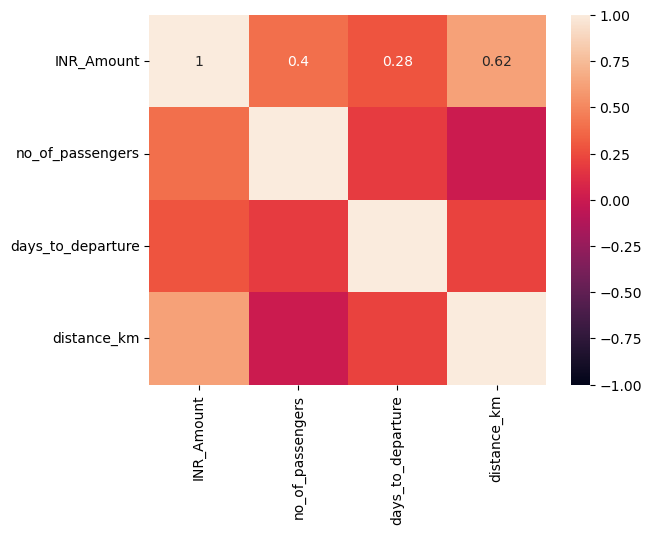

In [8]:

# Select only numerical columns
numerical_data = bookings_df.select_dtypes(include=[float, int])

# Generate the heatmap
sns.heatmap(numerical_data.corr(), annot=True, vmax=1, vmin=-1)
plt.show()

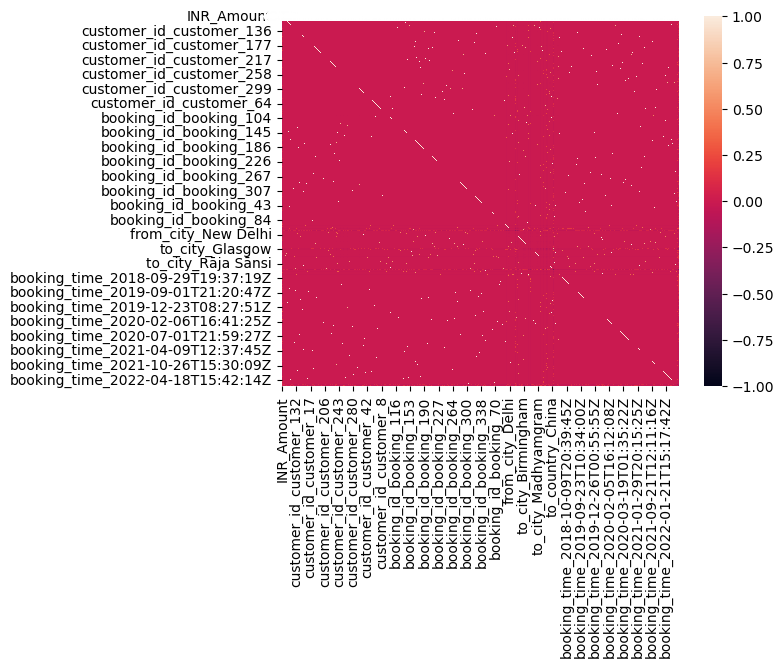

In [12]:
# Example: Converting categorical columns to numerical using one-hot encoding
bookings_encoded = pd.get_dummies(bookings_df, drop_first=True)

# Generate the heatmap
sns.heatmap(bookings_encoded.corr(), annot=True, vmax=1, vmin=-1)
plt.show()

In [ ]:
#8. For each service, which is the most used device type for making bookings on the 
platform?

In [14]:
service_device_grouped=bookings_df.groupby(['service_name','device_type_used']).agg({'booking_id':'count'}).reset_index()
#Groups the data by service_name and device_type_used.Aggregates the grouped data by counting the number of booking_id in each group.Resets the index so that the grouped columns become regular columns in the resulting DataFrame.
pivot_data=service_device_grouped.pivot(index=['service_name'],columns=['device_type_used'],values='booking_id').fillna(0)
#creates a pivot table 
#fillna Fills any missing values (NaNs) in the pivot table with 0.
print(pivot_data)

device_type_used  Android  Desktop   IOS  MobileWeb  Tablet
service_name                                               
GOIBIBO              44.0     61.0  70.0       11.0     0.0
MMT                   8.0     30.0   5.0        5.0     0.0
YATRA                18.0     51.0  22.0       11.0     3.0


In [6]:
#9.Plot the trends at a quarterly frequency for the no of bookings by each of the device types, i.e, plot a time series for each year and quarter showing the number of bookings performed by each device type

# Ensure 'booking_time' is a datetime object
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'])

# Extract the quarter and year, and combine them into a new column
bookings_df['quarter'] = bookings_df['booking_time'].dt.quarter.astype(str)
bookings_df['year'] = bookings_df['booking_time'].dt.year.astype(str)
bookings_df['year_quarter'] = bookings_df['year'] + "_" + bookings_df['quarter']

# Sort the DataFrame based on 'year' and 'quarter'
bookings = bookings_df.sort_values(['year', 'quarter'])

# Display the first few rows of the specified columns
print(bookings[['year_quarter', 'booking_id', 'device_type_used']].head())

   year_quarter   booking_id device_type_used
9        2018_3  booking_289          Desktop
31       2018_3  booking_121          Desktop
37       2018_3   booking_23          Android
40       2018_3   booking_74          Android
41       2018_3  booking_192          Android


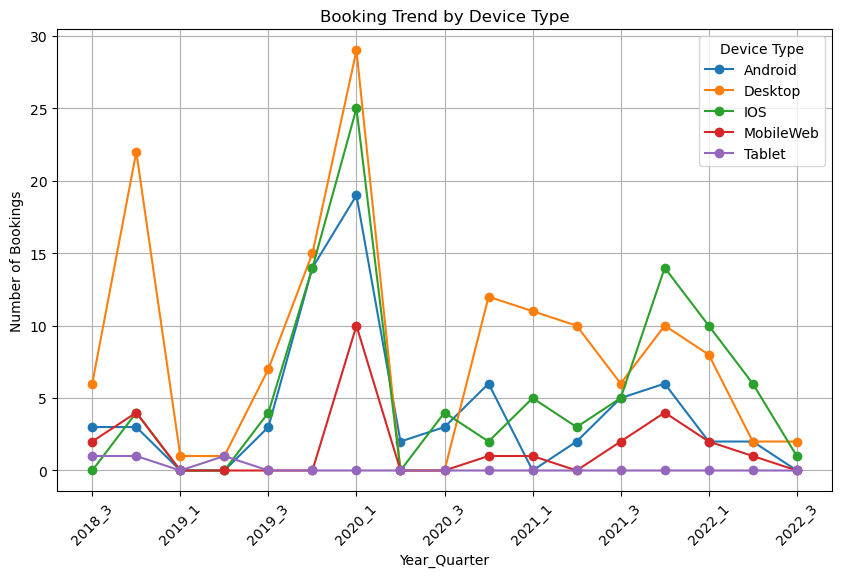

In [7]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by 'year_quarter' and 'device_type_used' and count the number of 'booking_id'
trend_data = bookings_df.groupby(['year_quarter', 'device_type_used']).agg({'booking_id': 'count'}).reset_index()

# Pivot the data to have 'year_quarter' as index and 'device_type_used' as columns
pivot_trend_data = trend_data.pivot(index='year_quarter', columns='device_type_used', values='booking_id').fillna(0)

# Plot the trend
plt.figure(figsize=(10, 6))
pivot_trend_data.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Booking Trend by Device Type')
plt.xlabel('Year_Quarter')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Device Type')
plt.show()


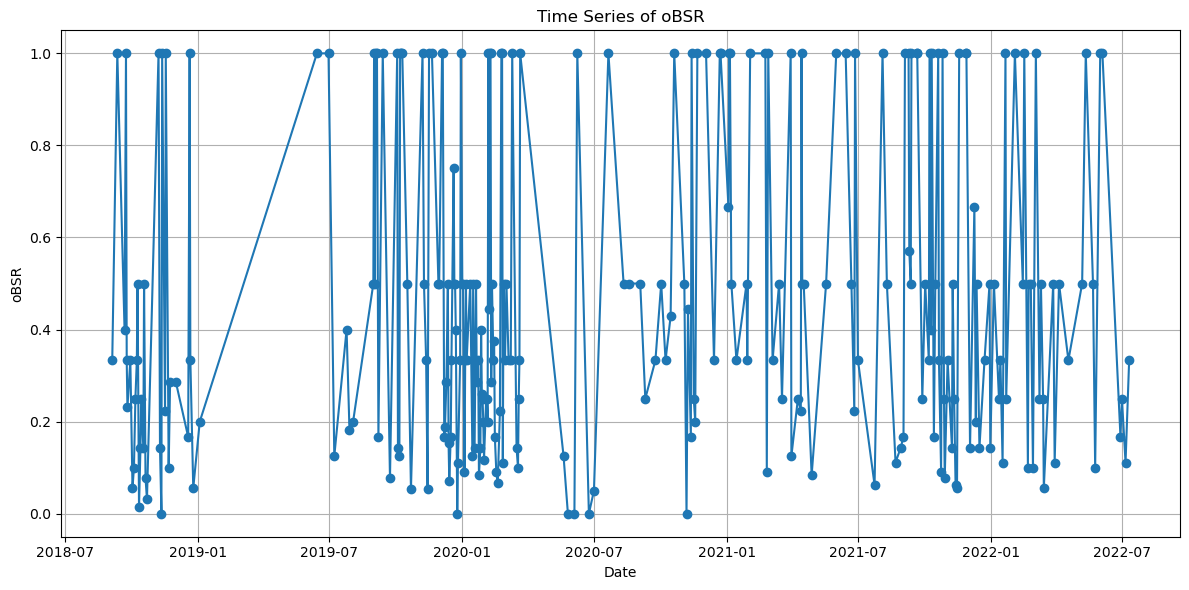

Average oBSR for each month of the year:
booking_time
1     0.232227
2     0.282486
3     0.228571
4     0.275000
5     0.181818
6     0.393939
7     0.150000
8     0.266667
9     0.373626
10    0.151420
11    0.215470
12    0.226131
dtype: float64

Average oBSR for each day of the week:
booking_time
0    0.200787
1    0.270642
2    0.156682
3    0.222603
4    0.251232
5    0.220000
6    0.309735
dtype: float64


In [29]:
#10.What is the average oBSR for each month of the year,for each day of the week &Plot a time series of oBSR on all the given dates
import pandas as pd
import matplotlib.pyplot as plt



# Convert dates to datetime, using the ISO8601 format
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'], format='ISO8601')
sessions_df['search_time'] = pd.to_datetime(sessions_df['search_time'], format='ISO8601')

# Merge the dataframes on booking_id
merged_df = pd.merge(sessions_df, bookings_df, on='booking_id', how='left')

# Calculate oBSR for each date
daily_searches = sessions_df.groupby(sessions_df['search_time'].dt.date).size()
daily_bookings = bookings_df.groupby(bookings_df['booking_time'].dt.date).size()

daily_obsr = (daily_bookings / daily_searches).fillna(0)

# Calculate monthly oBSR
merged_df['month'] = merged_df['search_time'].dt.month
monthly_searches = sessions_df.groupby(sessions_df['search_time'].dt.month).size()
monthly_bookings = bookings_df.groupby(bookings_df['booking_time'].dt.month).size()

monthly_obsr = (monthly_bookings / monthly_searches).fillna(0)

# Calculate daily oBSR for each day of the week
merged_df['day_of_week'] = merged_df['search_time'].dt.dayofweek
weekly_searches = sessions_df.groupby(sessions_df['search_time'].dt.dayofweek).size()
weekly_bookings = bookings_df.groupby(bookings_df['booking_time'].dt.dayofweek).size()

weekly_obsr = (weekly_bookings / weekly_searches).fillna(0)

# Plot the time series of oBSR
daily_obsr.plot(figsize=(12, 6), marker='o')
plt.title('Time Series of oBSR')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the results
print("Average oBSR for each month of the year:")
print(monthly_obsr)

print("\nAverage oBSR for each day of the week:")
print(weekly_obsr)


END OF PROJECT